In [1]:
import sys
sys.path.append('..')
import code_package.tools_func as tool
import code_package.model_package as mcr2_model
import importlib
import yaml
import code_package.mcr2_trainer as mcr2_trainer
import code_package.run_code_timer as run_code_timer
import torch
import os
importlib.reload(mcr2_model)
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
# 启用 LaTeX 风格文本渲染
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 11
matplotlib.rcParams['axes.titlesize'] = 11
matplotlib.rcParams['xtick.labelsize'] = 11
matplotlib.rcParams['ytick.labelsize'] = 11
matplotlib.rcParams['legend.fontsize'] = 11
from matplotlib import pyplot as plt

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd'] + ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd'] +['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd']

# Define 10 high-contrast, bright colors
colors = [
    '#4F83FF',  
    '#FF9933',  
    '#99CC33',  
    '#FF9999',  
    '#6666CC',  
    '#FFCC00',  
    '#99ccff',  
    '#CC99CC',  
    '#3ea03a',  
    '#CC0033'
]

In [ ]:
# 读取数据 和 model
data_folder = 'dataloaders'
data_path = os.path.join(data_folder,'3','cmapss_004.pt')
data_loader, data_set = torch.load(data_path,map_location=DEVICE)

# 准备model
base_dir = './res_lrd'
kl_weights = 0.001
model_path = os.path.join(base_dir, 'kl_'+str(kl_weights), 'models')
best_start = '2' 
mcr2_model_path = os.path.join(model_path, best_start, 'best_model.pth')
# model
params_path = os.path.join('model_params','cmapss_lrd.yaml')
cmapss_lrd_params = yaml.load(open(params_path, 'r'), Loader=yaml.FullLoader)
encoder_params = cmapss_lrd_params['encoder_params']
decoder_params = cmapss_lrd_params['decoder_params']
decoder_params['decoder_depth'] = 2
decoder_params['decoder_width'] = [200,50]
decoder_params['recons_activation'] = 'None'
encoder_params['encoder_activation'] = 'leaky_relu'
decoder_params['decoder_activation'] = 'leaky_relu'
encoder_params['cov_activation'] = 'sigmoid'
latent_dim = 3
class_dim = latent_dim
encoder_params['class_dim'] = class_dim
encoder_params['latent_dim'] = latent_dim
decoder_params['class_dim'] = class_dim
decoder_params['latent_dim'] = latent_dim
decoder_params['drop_rate'] = 0.1
mcr2 =  mcr2_model.MCR2(encoder_params, decoder_params, is_ts=0, kl_weights=kl_weights)
mcr2.load_state_dict(torch.load(mcr2_model_path, map_location=DEVICE)[0])
mcr2.to(DEVICE)
mcr2.eval()

# 准备model
import yaml
params_path = os.path.join('model_params','cmapss_ae.yaml')
cmapss_lrd_params = yaml.load(open(params_path, 'r'), Loader=yaml.FullLoader)
configs = yaml.load(open('configs/cmapss_cvae_config.yaml', 'r'), Loader=yaml.FullLoader)

encoder_params = cmapss_lrd_params['encoder_params']
decoder_params = cmapss_lrd_params['decoder_params']
encoder_params['class_dim'] = class_dim
encoder_params['latent_dim'] = latent_dim
decoder_params['class_dim'] = class_dim
decoder_params['latent_dim'] = latent_dim
decoder_params['recons_activation'] = None
base_dir = './res_cvae' 
kl_weights = 0.001
loss_dict = torch.load(os.path.join(base_dir, 'kl_'+str(kl_weights), 'val_loss_ls.pt'))
print(min(loss_dict, key=loss_dict.get))
model_path = os.path.join(base_dir, 'kl_'+str(kl_weights), 'models')
best_start =  str(min(loss_dict, key=loss_dict.get))
cvae_model_path = os.path.join(model_path, best_start, 'best_model.pth')
encoder_params['cov_activation'] = 'None'
encoder_params['mu_activation'] = 'None'
cvae =  mcr2_model.CVAE(encoder_params, decoder_params, is_ts=0, kl_weights=kl_weights)
cvae.load_state_dict(torch.load(cvae_model_path, map_location=DEVICE)[0])
cvae.eval()
cvae.to(DEVICE)

2


C:\Users\linan\AppData\Local\Temp\ipykernel_29452\978406194.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_loader, data_set = torch.load(data_path,map_location=DEV

CVAE(
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (encoder): CVAEEncoder(
    (encoder): Sequential(
      (layer0): Linear(in_features=17, out_features=50, bias=True)
      (dropout0): Dropout(p=0.0, inplace=False)
      (relu0): LeakyReLU(negative_slope=0.01)
      (layer1): Linear(in_features=50, out_features=50, bias=True)
      (dropout1): Dropout(p=0.0, inplace=False)
      (relu1): LeakyReLU(negative_slope=0.01)
      (layer2): Linear(in_features=50, out_features=200, bias=True)
      (dropout2): Dropout(p=0.0, inplace=False)
      (relu2): LeakyReLU(negative_slope=0.01)
    )
    (cov_vec_layer): Sequential(
      (cl): Linear(in_features=200, out_features=3, bias=True)
    )
    (mu_layer): Sequential(
      (ml): Linear(in_features=200, out_features=3, bias=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (layer0): Linear(in_features=6, out_features=200, bias=True)
      (dropout0): Dropout(p=0.1, inplace=False)
      (acti0): LeakyReLU(negativ

In [4]:
set_name = 'train'
with torch.no_grad():
    mcr2_res = mcr2(data_set[set_name][0], data_set[set_name][1], data_set[set_name][2])
    mcr2.lambdas = 1e-20
    mcr2_loss_res = mcr2.loss_function(mcr2_res, data_set[set_name][0])
    
    cvae_res = cvae(data_set[set_name][0], data_set[set_name][1], data_set[set_name][2])
    cvae_loss_res = cvae.loss_function(cvae_res, data_set[set_name][0])

d:\linan\code_simulated_data\LRD_project\code_cmapss\..\code_package\model_package.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prob = torch.reshape(torch.tensor(sample_weights).float().to(mu.device), (-1,1))*prob


In [5]:
all_s = torch.cat([data_set['train'][0], data_set['test'][0], data_set['valid'][0]], dim=0)
all_c = torch.cat([data_set['train'][1], data_set['test'][1], data_set['valid'][1]], dim=0)
all_r = torch.cat([data_set['train'][2], data_set['test'][2], data_set['valid'][2]], dim=0)
all_info  = torch.cat([data_set['train'][4], data_set['test'][4], data_set['valid'][4]], dim=0)

In [6]:
with torch.no_grad():
    mcr2_res = mcr2(all_s, all_c, all_r)
    mcr2.lambdas = 1e-20
    mcr2_loss_res = mcr2.loss_function(mcr2_res, all_s)
    
    cvae_res = cvae(all_s, all_c, all_r)
    cvae_loss_res = cvae.loss_function(cvae_res, all_s)

In [7]:
type_0 = []
type_1 = []
for i in range(1, 250):
    idx1 = all_info[:,0] == i
    idx2 = mcr2_res['z'][idx1][:,1].argsort()
    label = mcr2_res['z'][idx1][idx2][-1,2]>0
    if label:
        type_1.append(i)
    else:
        type_0.append(i)

In [8]:
# 变成一个二分类问题，label 的分割从 0.2-0.6-0.8 切割。
# 构造label:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
cvaegmm = GaussianMixture(n_components=latent_dim, covariance_type='diag', random_state=0)
cvaegmm.fit(cvae_res['z'].cpu().numpy())
cvae_label_test = cvaegmm.predict(cvae_res['z'].cpu().numpy())
mcr2_pred_label = np.argmax(mcr2_res['prob'].cpu().numpy(), axis=1)
cvae_pred_label = cvaegmm.predict(cvae_res['z'].cpu().numpy())
clu_idx = [1,0,2]
ratio =  0.2
h = 50
f = 100
true_label_r = all_info.cpu().numpy()[:,1].copy()*0
true_label_h = all_info.cpu().numpy()[:,1].copy()*0
true_label_f = all_info.cpu().numpy()[:,1].copy()*0
for i in range(1, 250):
    unit_idx = (all_info.cpu().numpy()[:,0]  == i)
    datar = all_info[unit_idx][:,1].cpu().numpy()
    data2a = datar/np.max(datar)
    label_idx = (mcr2_pred_label[unit_idx] == clu_idx[0])
    true_label_r[unit_idx] = data2a > ratio
    true_label_h[unit_idx] = datar > h
    true_label_f[unit_idx] = (datar.max() - datar) < f

In [9]:
mcr2_pred_label = np.argmax(mcr2_res['prob'].cpu().numpy(), axis=1)
mcr2_pred_label[mcr2_pred_label==1] = -1
mcr2_pred_label[mcr2_pred_label!=-1] = 0
mcr2_pred_label = mcr2_pred_label + 1
cvae_pred_label = cvaegmm.predict(cvae_res['z'].cpu().numpy())
cvae_pred_label[cvae_pred_label==0] = -1
cvae_pred_label[cvae_pred_label!=-1] = 0
cvae_pred_label = cvae_pred_label+1

In [17]:
print((mcr2_pred_label == true_label_r).sum()/len(mcr2_pred_label), (cvae_pred_label == true_label_r).sum()/len(cvae_pred_label))
print((mcr2_pred_label == true_label_h).sum()/len(mcr2_pred_label), (cvae_pred_label == true_label_h).sum()/len(cvae_pred_label))
print((mcr2_pred_label == true_label_f).sum()/len(mcr2_pred_label), (cvae_pred_label == true_label_f).sum()/len(cvae_pred_label))

0.656337246322389 0.6189325540008817
0.6434064229620076 0.5937566327613512
0.761661414880243 0.7329425786543454


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 假设：mcr2_pred_label, cvae_pred_label, all_info, clu_idx 已提前加载至内存中
unit_ids = all_info.cpu().numpy()[:, 0]
sensor_vals = all_info.cpu().numpy()[:, 1]
num_samples = len(sensor_vals)

# 保存结果
results_r = []
results_h = []
results_f = []

# 遍历 ratio（归一化阈值）
for ratio in np.linspace(0.0, 0.9, 10):
    true_label_r = np.zeros(num_samples)
    for i in range(1, 250):
        unit_idx = (unit_ids == i)
        datar = sensor_vals[unit_idx]
        norm_data = datar / np.max(datar) if np.max(datar) > 0 else datar
        true_label_r[unit_idx] = norm_data > ratio

    acc_mcr2 = (mcr2_pred_label == true_label_r).sum() / num_samples
    acc_cvae = (cvae_pred_label == true_label_r).sum() / num_samples
    results_r.append((ratio, acc_mcr2, acc_cvae))

# 遍历 h（原始值）
for h in range(0, 400, 40):
    true_label_h = (sensor_vals > h).astype(int)
    acc_mcr2 = (mcr2_pred_label == true_label_h).sum() / num_samples
    acc_cvae = (cvae_pred_label == true_label_h).sum() / num_samples
    results_h.append((h, acc_mcr2, acc_cvae))

# 遍历 f（距离最大值）
for f in range(50, 450, 40):
    true_label_f = np.zeros(num_samples)
    for i in range(1, 250):
        unit_idx = (unit_ids == i)
        datar = sensor_vals[unit_idx]
        max_val = datar.max()
        true_label_f[unit_idx] = (max_val - datar) < f
    acc_mcr2 = (mcr2_pred_label == true_label_f).sum() / num_samples
    acc_cvae = (cvae_pred_label == true_label_f).sum() / num_samples
    results_f.append((f, acc_mcr2, acc_cvae))


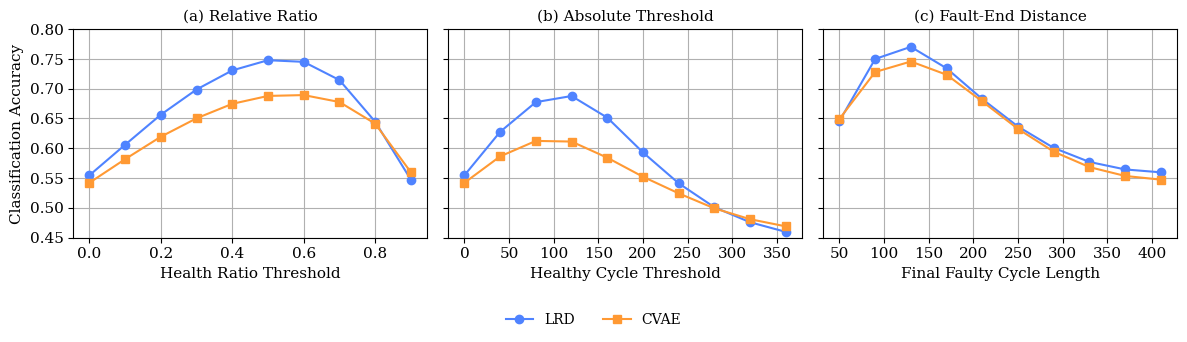

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_all_subplots(results_r, results_h, results_f, save_path=None):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3.2), sharey=True)

    # 全局字体设置
    plt.rcParams.update({
        'font.size': 11,
        'axes.labelsize': 11,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })

    # 颜色与样式
    markers = ['o', 's']
    labels = ['LRD', 'CVAE']

    # 子图1: Ratio
    x = [r[0] for r in results_r]
    y1 = [r[1] for r in results_r]
    y2 = [r[2] for r in results_r]
    axs[0].plot(x, y1, label=labels[0], marker=markers[0], color=colors[0])
    axs[0].plot(x, y2, label=labels[1], marker=markers[1], color=colors[1])
    axs[0].set_xlabel('Health Ratio Threshold')
    axs[0].set_ylabel('Classification Accuracy')
    axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    axs[0].set_title('(a) Relative Ratio')

    # 子图2: h Threshold
    x = [r[0] for r in results_h]
    y1 = [r[1] for r in results_h]
    y2 = [r[2] for r in results_h]
    axs[1].plot(x, y1, marker=markers[0], color=colors[0])
    axs[1].plot(x, y2, marker=markers[1], color=colors[1])
    axs[1].set_xlabel('Healthy Cycle Threshold')
    axs[1].set_title('(b) Absolute Threshold')

    # 子图3: f Threshold
    x = [r[0] for r in results_f]
    y1 = [r[1] for r in results_f]
    y2 = [r[2] for r in results_f]
    axs[2].plot(x, y1, marker=markers[0], color=colors[0])
    axs[2].plot(x, y2, marker=markers[1], color=colors[1])
    axs[2].set_xlabel('Final Faulty Cycle Length')
    axs[2].set_title('(c) Fault-End Distance')

    for ax in axs:
        ax.grid(True)
        ax.set_ylim(0.45, 0.8)

    # 合并图例到图下方
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.08))

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # 给 legend 留空间

    # 保存为PDF用于插入论文
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', format='pdf')
    plt.show()

# 调用函数
plot_all_subplots(results_r, results_h, results_f, save_path="fig_accuracy_curve.pdf")


In [34]:
# 用隐变量使用线性回归预测剩余可用寿命
from sklearn.linear_model import LinearRegression
import numpy as np
# 准备数据
X = mcr2_res['z'].cpu().numpy()
y = all_info.cpu().numpy()[:, 1]  # 假设第二列是RUL
# 创建线性回归模型
model = LinearRegression()
# 拟合模型
model.fit(X, y)
# 预测
predictions = model.predict(X)
# 计算R2分数
from sklearn.metrics import r2_score
r2 = r2_score(y, predictions)
print(f'R2 Score: {r2}')

R2 Score: 0.4358740448951721


In [35]:
# 准备数据
X = cvae_res['z'].cpu().numpy()
y = all_info.cpu().numpy()[:, 1]  # 假设第二列是RUL
# 创建线性回归模型
model = LinearRegression()
# 拟合模型
model.fit(X, y)
# 预测
predictions = model.predict(X)
# 计算R2分数
from sklearn.metrics import r2_score
r2 = r2_score(y, predictions)
print(f'R2 Score: {r2}')

R2 Score: 0.3480392098426819


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Step 1: 构造 RUL（剩余寿命）标签：对每个 unit 单独计算 max - 当前时间
all_info_np = all_info.cpu().numpy()
unit_ids = all_info_np[:, 0]
cycle_values = all_info_np[:, 1]

rul_labels = np.zeros_like(cycle_values)
for unit in np.unique(unit_ids):
    unit_mask = (unit_ids == unit)
    unit_cycles = cycle_values[unit_mask]
    max_cycle = np.max(unit_cycles)
    rul_labels[unit_mask] = max_cycle - unit_cycles

# Step 2: 提取隐变量（假设来自 mcr2 结果）
X = mcr2_res['z'].cpu().numpy()
y = rul_labels  # 用转换后的 RUL 作为目标变量

# Step 3: 建立线性回归模型
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Step 4: 评估模型性能
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f'R² Score: {r2:.4f}')
print(f'MSE: {mse:.4f}')


R² Score: 0.4970
MSE: 4054.3166


In [37]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression

# X: [n_samples, n_features] 隐变量
# y: [n_samples] RUL 标签
# 确保是 numpy array
X_np = np.asarray(X)
y_np = np.asarray(y)

n_features = X_np.shape[1]

# 存储结果
results = {
    'feature': [],
    'pearson_r': [],
    'pearson_p': [],
    'spearman_r': [],
    'spearman_p': [],
    'kendall_tau': [],
    'kendall_p': [],
    'mutual_info': []
}

for i in range(n_features):
    xi = X_np[:, i]

    # Pearson
    pearson_r, pearson_p = pearsonr(xi, y_np)

    # Spearman
    spearman_r, spearman_p = spearmanr(xi, y_np)

    # Kendall
    kendall_r, kendall_p = kendalltau(xi, y_np)

    results['feature'].append(f'z{i}')
    results['pearson_r'].append(pearson_r)
    results['pearson_p'].append(pearson_p)
    results['spearman_r'].append(spearman_r)
    results['spearman_p'].append(spearman_p)
    results['kendall_tau'].append(kendall_r)
    results['kendall_p'].append(kendall_p)

# Mutual Information (非参数方法)
mi_scores = mutual_info_regression(X_np, y_np, random_state=42)
results['mutual_info'] = mi_scores.tolist()

# 转为 DataFrame 展示
df_corr = pd.DataFrame(results)
df_corr = df_corr.set_index('feature')

df_corr

,pearson_r,pearson_p,spearman_r,spearman_p,kendall_tau,kendall_p,mutual_info
feature,,,,,,,
z0,0.423748,0.0,0.417885,0.0,0.307232,0.0,0.334159
z1,-0.683864,0.0,-0.721490,0.0,-0.525152,0.0,0.449505
z2,0.387310,0.0,0.324040,0.0,0.221396,0.0,0.356420


In [38]:
# Step 1: 构造 RUL（剩余寿命）标签：对每个 unit 单独计算 max - 当前时间
all_info_np = all_info.cpu().numpy()
unit_ids = all_info_np[:, 0]
cycle_values = all_info_np[:, 1]

rul_labels = np.zeros_like(cycle_values)
for unit in np.unique(unit_ids):
    unit_mask = (unit_ids == unit)
    unit_cycles = cycle_values[unit_mask]
    max_cycle = np.max(unit_cycles)
    rul_labels[unit_mask] = max_cycle - unit_cycles

# Step 2: 提取隐变量（假设来自 mcr2 结果）
X = cvae_res['z'].cpu().numpy()
y = rul_labels  # 用转换后的 RUL 作为目标变量

# Step 3: 建立线性回归模型
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Step 4: 评估模型性能
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f'R² Score: {r2:.4f}')
print(f'MSE: {mse:.4f}')


R² Score: 0.4677
MSE: 4290.8448


In [146]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression

# X: [n_samples, n_features] 隐变量
# y: [n_samples] RUL 标签
# 确保是 numpy array
X_np = np.asarray(X)
y_np = np.asarray(y)

n_features = X_np.shape[1]

# 存储结果
results = {
    'feature': [],
    'pearson_r': [],
    'pearson_p': [],
    'spearman_r': [],
    'spearman_p': [],
    'kendall_tau': [],
    'kendall_p': [],
    'mutual_info': []
}

for i in range(n_features):
    xi = X_np[:, i]

    # Pearson
    pearson_r, pearson_p = pearsonr(xi, y_np)

    # Spearman
    spearman_r, spearman_p = spearmanr(xi, y_np)

    # Kendall
    kendall_r, kendall_p = kendalltau(xi, y_np)

    results['feature'].append(f'z{i}')
    results['pearson_r'].append(pearson_r)
    results['pearson_p'].append(pearson_p)
    results['spearman_r'].append(spearman_r)
    results['spearman_p'].append(spearman_p)
    results['kendall_tau'].append(kendall_r)
    results['kendall_p'].append(kendall_p)

# Mutual Information (非参数方法)
mi_scores = mutual_info_regression(X_np, y_np, random_state=42)
results['mutual_info'] = mi_scores.tolist()

# 转为 DataFrame 展示
df_corr = pd.DataFrame(results)
df_corr = df_corr.set_index('feature')

df_corr

,pearson_r,pearson_p,spearman_r,spearman_p,kendall_tau,kendall_p,mutual_info
feature,,,,,,,
z0,0.166534,0.0,0.159005,0.0,0.106674,0.0,0.021366
z1,-0.377649,0.0,-0.317279,0.0,-0.227181,0.0,0.229072
z2,0.548120,0.0,0.538224,0.0,0.384827,0.0,0.316019
